In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
import datetime


In [2]:
dataset = pd.read_csv('moedas.csv')

In [4]:
dataset.shape

(456, 7)

In [6]:
dataset

,Date,HOLO,HELIUM,eCash,SHIBA,NEXO,SOLANA
0,2021-07-08 00:00:00+00:00,0.005752,12.170575,0.000026,0.000008,1.594480,33.203728
1,2021-07-09 00:00:00+00:00,0.005804,12.508923,0.000026,0.000008,1.639455,33.264648
2,2021-07-10 00:00:00+00:00,0.005687,12.942661,0.000026,0.000008,1.627516,31.788645
3,2021-07-11 00:00:00+00:00,0.005771,12.811461,0.000026,0.000008,1.632134,32.177841
4,2021-07-12 00:00:00+00:00,0.005639,12.592767,0.000026,0.000008,1.568177,30.848087
...,...,...,...,...,...,...,...
451,2022-10-02 00:00:00+00:00,0.001970,4.806920,0.000040,0.000011,0.866362,32.055698
452,2022-10-03 00:00:00+00:00,0.002013,4.930039,0.000041,0.000011,0.877267,32.967621
453,2022-10-04 00:00:00+00:00,0.002032,5.215694,0.000042,0.000012,0.902363,34.122471
454,2022-10-05 00:00:00+00:00,0.002026,5.653285,0.000042,0.000011,0.895997,34.073883


In [7]:
dataset.describe()

,HOLO,HELIUM,eCash,SHIBA,NEXO,SOLANA
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,0.005889,19.293132,0.000094,0.000020,1.735302,97.257412
std,0.003575,11.024112,0.000065,0.000014,0.693754,62.847116
min,0.001913,3.396728,0.000019,0.000006,0.561336,23.489555
25%,0.002488,9.404402,0.000044,0.000011,1.054175,38.473213
50%,0.004922,19.456189,0.000075,0.000013,1.820369,88.975975
75%,0.008671,25.138861,0.000115,0.000027,2.249769,147.815014
max,0.015527,52.711040,0.000330,0.000080,3.443478,258.934326


In [10]:
#TAXA DE RETORNO GERAL


((dataset['SHIBA'][len(dataset)-1]-dataset['SHIBA'][0])/dataset['SHIBA'][0])*100

39.38798737121129

In [19]:
for i in np.arange(1,len(dataset.columns)):
    print(dataset.columns[i])
    print(((dataset[dataset.columns[i]][len(dataset)-1]-dataset[dataset.columns[i]][0])/dataset[dataset.columns[i]][0])*100)
    print('\n')

HOLO
-65.08744587861422


HELIUM
-58.13595806789542


eCash
64.2651971844003


SHIBA
39.38798737121129


NEXO
-43.76809469395763


SOLANA
0.6970117040614382




In [23]:
#TAXA DE RETORNO DIÁRIA

dataset['RS HOLO'] = (dataset['HOLO']/dataset['HOLO'].shift(1))-1
dataset['RS HELIUM'] = (dataset['HELIUM']/dataset['HELIUM'].shift(1))-1
dataset['RS eCash'] = (dataset['eCash']/dataset['eCash'].shift(1))-1
dataset['RS SHIBA'] = (dataset['SHIBA']/dataset['SHIBA'].shift(1))-1
dataset['RS NEXO'] = (dataset['NEXO']/dataset['NEXO'].shift(1))-1
dataset['RS SOLANA'] = (dataset['SOLANA']/dataset['SOLANA'].shift(1))-1

In [41]:
#TAXA DE RETORNO ANUAL

len(dataset[(dataset['Date']>'2021-07-08') & (dataset['Date']<'2022-07-09')])

366

In [42]:
(dataset['RS HOLO'].mean()*366)*100

-21.61514871555199

In [56]:
for i in np.arange(7,len(dataset.columns)):
    print(dataset.columns[i])
    print((dataset[dataset.columns[i]].mean()*366)*100)
    print('\n')

RS HOLO
-21.61514871555199


RS HELIUM
21.421799181016237


RS eCash
151.7890171896278


RS SHIBA
154.05887821048353


RS NEXO
-4.3120100529709156


RS SOLANA
67.31961529446644




In [57]:
#TAXA DE RETORNO LOGARITMICA

np.log(dataset['HOLO'][len(dataset)-1]/dataset['HOLO'][0])*100

-105.23237045171878

In [61]:
for i in np.arange(1,len(dataset.columns)):
    print(dataset.columns[i])
    print(np.log(dataset[dataset.columns[i]][len(dataset)-1]/dataset[dataset.columns[i]][0])*100)
    print('\n')

HOLO
-105.23237045171878


HELIUM
-87.0742915291881


eCash
49.6311991811247


SHIBA
33.20911348174898


NEXO
-57.56858801029164


SOLANA
0.694593806335056


RS HOLO
nan


RS HELIUM
nan


RS eCash
nan


RS SHIBA
nan


RS NEXO
nan


RS SOLANA
nan




In [62]:
dataset['Ret_log HOLO'] = np.log(dataset['HOLO']/dataset['HOLO'].shift(1))
dataset['Ret_log HELIUM'] = np.log(dataset['HELIUM']/dataset['HELIUM'].shift(1))
dataset['Ret_log eCash'] = np.log(dataset['eCash']/dataset['eCash'].shift(1))
dataset['Ret_log SHIBA'] = np.log(dataset['SHIBA']/dataset['SHIBA'].shift(1))
dataset['Ret_log NEXO'] = np.log(dataset['NEXO']/dataset['NEXO'].shift(1))
dataset['Ret_log SOLANA'] = np.log(dataset['SOLANA']/dataset['SOLANA'].shift(1))

<AxesSubplot:>

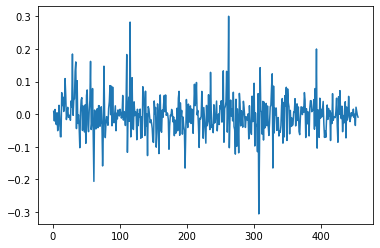

In [63]:
dataset['Ret_log HOLO'].plot()

In [66]:
(dataset['Ret_log HOLO'].mean()*366)*100

-84.6484562314925

In [70]:
for i in np.arange(13,len(dataset.columns)):
    print(dataset.columns[i])
    print((dataset[dataset.columns[i]].mean()*366)*100)
    print('\n')

Ret_log HOLO
-84.6484562314925


Ret_log HELIUM
-70.04217736194039


Ret_log eCash
39.923118462179346


Ret_log SHIBA
26.713264910593715


Ret_log NEXO
-46.30791914674008


Ret_log SOLANA
0.5587282046563999


